<a href="https://colab.research.google.com/github/SaurabhMulgaonkarNW/ReStock/blob/main/Text_processing_Mapping_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data

In [1]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 10.0 MB/s 
     |████████████████████████████████| 511.7 MB 4.6 kB/s 
     |████████████████████████████████| 5.8 MB 50.8 MB/s 
     |████████████████████████████████| 438 kB 28.1 MB/s 
     |████████████████████████████████| 1.6 MB 49.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [2]:
# Importing all required libraries

import pandas as pd
import numpy as np

import re
import sys

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
#path = "/content/drive/MyDrive/Capstone_Project/Data"
df_mc = pd.read_csv('/content/drive/MyDrive/Capstone_Project/Data/Data_mc_v3.csv')
df_nse = pd.read_csv('/content/drive/MyDrive/Capstone_Project/Data/data_nse_1.csv')
df_hdfc = pd.read_csv('/content/drive/MyDrive/Capstone_Project/Data/HDFCBANK.csv')

#df_mc = pd.read_csv('/content/Data_mc_v2.csv')
#df_nse = pd.read_csv('/content/data_nse_1.csv')

# Dataset is now stored in a Pandas Dataframe

In [4]:
# Requirements for nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [5]:
# replace punctuations with space
def remove_punc(text):
  return re.sub('[^a-zA-Z]',' ', str(text))

# lower case
def lower_case(text):
  return text.lower()

# Remove tags
def remove_tags(text):
  return re.sub("&lt;/?.*?&gt;","&lt;&gt; ", text)

# Remove special characters and digits
def remove_special_chars_and_digits(text):
  return re.sub("(\\d|\\W)+"," ", text)

# Create tokens
def run_nltk_tokenizer(text):
  tokens = nltk.word_tokenize(text)
  return tokens

# Remove stop words
def remove_stop_words(text):
  stop_words = set(stopwords.words('english'))-set(['no','not'])
  word_tokens =run_nltk_tokenizer(text)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return filtered_sentence

# Perform lemmatization
def apply_lemmatization(wlist):
  lem= WordNetLemmatizer()
  output = ' '.join([lem.lemmatize(w) for w in wlist])
  return output

# Full Cleaning text
def normalize(text):
  text = remove_punc(text)
  text = lower_case(text)
  text = remove_tags(text)
  text = remove_special_chars_and_digits(text)
  text = remove_stop_words(text)
  text = apply_lemmatization(text)
  return text

In [6]:
#df_nse.drop('Series',inplace=True,axis=1)
df_hdfc.drop('Series',inplace=True,axis=1)

In [7]:
df_mc.drop(['timestamp','link','author'],inplace=True,axis=1)


In [8]:
df_mc.head()

,title,desc,content,Date
0,Your life insurance claim would be valid in th...,"However, read your policy’s fine print as ther...",With an Indian life lost in the war-hit region...,2022-03-07
1,Inflation is a monster that can eat your savin...,Most of us focus on savings and forget to inve...,Inflation may be something not many people und...,2022-03-07
2,Motherhood ahead? Plan for your child’s expens...,The kitty will come in handy in case you need ...,"For most parents-to-be, personal lives take a ...",2022-03-07
3,Women can manage money just as well as men. He...,Budgeting and finance come naturally to women....,Take the case of our client Rajani. When she w...,2022-03-08
4,Peculiar money challenges for single women acr...,There has been a substantial rise in the numbe...,Although the basics of financial planning rema...,2022-03-08


In [9]:
#df_nse.head()
df_hdfc.tail()

,Symbol,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1368,HDFCBANK,2022-07-11,1397.10,1394.00,1409.90,1393.25,1403.20,1406.15,1403.07,3731440,5.235481e+14,115690,2385267,0.6392
1369,HDFCBANK,2022-07-12,1406.15,1405.25,1405.25,1389.40,1391.20,1391.80,1395.12,4938487,6.889788e+14,107652,3382902,0.6850
1370,HDFCBANK,2022-07-13,1391.80,1390.00,1394.20,1354.25,1359.55,1357.85,1371.20,7972805,1.093230e+15,185857,5063094,0.6350
1371,HDFCBANK,2022-07-14,1357.85,1362.00,1372.65,1349.25,1352.00,1351.05,1359.74,5186205,7.051894e+14,156703,2992747,0.5771
1372,HDFCBANK,2022-07-15,1351.05,1353.00,1364.90,1346.80,1364.00,1362.05,1357.60,6797823,9.228735e+14,126512,4710365,0.6929


In [10]:
df1= df_hdfc[df_hdfc.Date>='2022-03-07']

In [11]:
df1.shape

(91, 14)

In [12]:
df_mc.shape

(3233, 4)

# Text Processing

In [13]:
df_mc['cleaned_title']=df_mc['title'].apply(normalize)

In [14]:
df_mc['cleaned_desc']=df_mc['desc'].apply(normalize)

In [15]:
df_mc['cleaned_content']=df_mc['content'].apply(normalize)

In [16]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            3233 non-null   object
 1   desc             2889 non-null   object
 2   content          3057 non-null   object
 3   Date             3233 non-null   object
 4   cleaned_title    3233 non-null   object
 5   cleaned_desc     3233 non-null   object
 6   cleaned_content  3233 non-null   object
dtypes: object(7)
memory usage: 176.9+ KB


# Group df_mc by date

In [17]:
a=df_mc.astype({"desc": str, "content": str}).groupby('Date', as_index = False) # Removes null values in content column
A=a.agg({'cleaned_title': ' '.join,
       'cleaned_desc': ' '.join,
      'cleaned_content': ' '.join})

In [18]:
A.head()

,Date,cleaned_title,cleaned_desc,cleaned_content
0,2022-03-07,life insurance claim would valid case death du...,however read policy fine print could certain e...,indian life lost war hit region ukraine concer...
1,2022-03-08,woman manage money well men step peculiar mone...,budgeting finance come naturally woman yet shy...,take case client rajani single father used tak...
2,2022-03-09,sell equity buy gold instead amfi see uptick f...,risk taking investor follow extreme strategy s...,fall stock price make many investor nervous es...
3,2022-03-10,planning summer holiday five co branded airlin...,frequent traveller loyal airline airline co br...,nan investor withdrawal across several debt sc...
4,2022-03-11,explained crypto taxation work india hypertens...,loss arising crypto trading not offset kind in...,profit profit loss loss goi no set loss arisin...


In [19]:
A.Date[-5:]

117    2022-07-17
118    2022-07-18
119    2022-07-28
120    2022-07-29
121    2022-07-30
Name: Date, dtype: object

In [20]:
B=A.copy()

In [21]:
C=A[A.Date<='2022-07-15']

In [22]:
#B.drop(index=[116,117,118],inplace=True) # removing dates to match MCtrl data

In [23]:
'''def dataframe_date_creation(start_date, end_date):

  "Create a dataframe consisting of dates from start date to end date in str format"

  date_range=pd.date_range(start=start_date,end=end_date) # Create a date range, enter date in yyyy-mm-dd format
  df = pd.DataFrame(data=date_range, columns=['Date']) # Create dataframe with date as datetime type

  df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%y').dt.date #date only dd-mm-yyyy format
  df['Date']=df['Date'].astype(str) # Convert to str

  return df
'''

'def dataframe_date_creation(start_date, end_date):\n\n  "Create a dataframe consisting of dates from start date to end date in str format"\n\n  date_range=pd.date_range(start=start_date,end=end_date) # Create a date range, enter date in yyyy-mm-dd format\n  df = pd.DataFrame(data=date_range, columns=[\'Date\']) # Create dataframe with date as datetime type\n\n  df[\'Date\']=pd.to_datetime(df[\'Date\'],format=\'%d-%m-%y\').dt.date #date only dd-mm-yyyy format\n  df[\'Date\']=df[\'Date\'].astype(str) # Convert to str\n\n  return df\n'

In [24]:
#dfnew = dataframe_date_creation("2022-03-07","2022-07-15")

In [25]:
#pd.merge(left=df_hdfc, right=B, on= 'Date', how='outer').to_csv('hdfcmergeouter.csv')#join1=
#merged_df = left.merge(right, on='P', how='outer')

In [26]:
join1=pd.merge(left=df1, right=C, on= 'Date', how='outer')#.to_csv('hdfcmergeouter_samedates.csv')#join1=

In [27]:
join1.head()

,Symbol,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,cleaned_title,cleaned_desc,cleaned_content
0,HDFCBANK,2022-03-07,1366.50,1318.5,1332.35,1297.05,1326.00,1324.80,1314.70,13527229.0,1.778424e+15,426139.0,8418793.0,0.6224,life insurance claim would valid case death du...,however read policy fine print could certain e...,indian life lost war hit region ukraine concer...
1,HDFCBANK,2022-03-08,1324.80,1302.2,1334.00,1292.00,1333.00,1327.80,1305.18,19606246.0,2.558968e+15,527016.0,11934591.0,0.6087,woman manage money well men step peculiar mone...,budgeting finance come naturally woman yet shy...,take case client rajani single father used tak...
2,HDFCBANK,2022-03-09,1327.80,1330.0,1374.70,1318.85,1371.05,1371.15,1347.62,11567347.0,1.558836e+15,330592.0,7459892.0,0.6449,sell equity buy gold instead amfi see uptick f...,risk taking investor follow extreme strategy s...,fall stock price make many investor nervous es...
3,HDFCBANK,2022-03-10,1371.15,1427.0,1427.00,1380.25,1388.90,1392.70,1404.82,11136603.0,1.564487e+15,277256.0,5815424.0,0.5222,planning summer holiday five co branded airlin...,frequent traveller loyal airline airline co br...,nan investor withdrawal across several debt sc...
4,HDFCBANK,2022-03-11,1392.70,1388.0,1408.95,1372.70,1396.00,1396.80,1396.47,7575390.0,1.057880e+15,204283.0,4434451.0,0.5854,explained crypto taxation work india hypertens...,loss arising crypto trading not offset kind in...,profit profit loss loss goi no set loss arisin...


# Joining datasets

In [28]:
join1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              91 non-null     object 
 1   Date                116 non-null    object 
 2   Prev Close          91 non-null     float64
 3   Open                91 non-null     float64
 4   High                91 non-null     float64
 5   Low                 91 non-null     float64
 6   Last                91 non-null     float64
 7   Close               91 non-null     float64
 8   VWAP                91 non-null     float64
 9   Volume              91 non-null     float64
 10  Turnover            91 non-null     float64
 11  Trades              91 non-null     float64
 12  Deliverable Volume  91 non-null     float64
 13  %Deliverble         91 non-null     float64
 14  cleaned_title       116 non-null    object 
 15  cleaned_desc        116 non-null    object 
 16  cleaned_

In [29]:
join2=join1.sort_values(by=['Date'],ignore_index=True )

In [30]:
join2.to_csv('joined_by_date_and_sorted.csv')

In [31]:
#join2[join2.Close.isnull()]

In [32]:
join2.head(2)

,Symbol,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,cleaned_title,cleaned_desc,cleaned_content
0,HDFCBANK,2022-03-07,1366.5,1318.5,1332.35,1297.05,1326.0,1324.8,1314.70,13527229.0,1.778424e+15,426139.0,8418793.0,0.6224,life insurance claim would valid case death du...,however read policy fine print could certain e...,indian life lost war hit region ukraine concer...
1,HDFCBANK,2022-03-08,1324.8,1302.2,1334.00,1292.00,1333.0,1327.8,1305.18,19606246.0,2.558968e+15,527016.0,11934591.0,0.6087,woman manage money well men step peculiar mone...,budgeting finance come naturally woman yet shy...,take case client rajani single father used tak...


In [33]:
join2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              91 non-null     object 
 1   Date                116 non-null    object 
 2   Prev Close          91 non-null     float64
 3   Open                91 non-null     float64
 4   High                91 non-null     float64
 5   Low                 91 non-null     float64
 6   Last                91 non-null     float64
 7   Close               91 non-null     float64
 8   VWAP                91 non-null     float64
 9   Volume              91 non-null     float64
 10  Turnover            91 non-null     float64
 11  Trades              91 non-null     float64
 12  Deliverable Volume  91 non-null     float64
 13  %Deliverble         91 non-null     float64
 14  cleaned_title       116 non-null    object 
 15  cleaned_desc        116 non-null    object 
 16  cleaned_

In [34]:
cond = join2["Close"].isnull()
join2.loc[cond, "Date"] = np.nan

In [35]:
join2["Date"].ffill(inplace=True)

In [36]:
join2.to_csv('join2.csv')

In [37]:
join3 = join2.copy()

In [38]:
a=df_mc.astype({"desc": str, "content": str}).groupby('Date', as_index = False) # Removes null values in content column
A=a.agg({'cleaned_title': ' '.join,
       'cleaned_desc': ' '.join,
      'cleaned_content': ' '.join})

In [39]:
join4 = join3.groupby('Date', as_index = False).agg({'cleaned_title': ' '.join,
                                             'cleaned_desc': ' '.join,
                                              'cleaned_content': ' '.join,
                                              'Prev Close':sum,
                                              'Open': sum,
                                              'High':sum,
                                              'Low':sum,
                                              'Last':sum,
                                              'Close':sum,
                                              'VWAP':sum,
                                              'Volume':sum,
                                              'Turnover':sum,
                                              'Trades':sum,
                                              'Deliverable Volume':sum,
                                              '%Deliverble':sum     })

In [40]:
join4.to_csv('join4.csv')

In [41]:
#join3['20MICRONS_Close'].fillna(method='ffill', inplace=True) # forward fill 
#join3['cleaned_title'].fillna(value='None', inplace=True)
#join3['cleaned_desc'].fillna(value='None', inplace=True)
#join3['cleaned_content'].fillna(value='None', inplace=True)
#join3.info()
# join3.to_csv('join3.csv',index=False)
#close_price = join3[['Date','20MICRONS_Close']]
# closing price df
#close_price.to_csv('close_price.csv', index=False)

# Dataset creation

In [42]:
dataset = join4.copy()

In [43]:
dataset.head(10)

,Date,cleaned_title,cleaned_desc,cleaned_content,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2022-03-07,life insurance claim would valid case death du...,however read policy fine print could certain e...,indian life lost war hit region ukraine concer...,1366.50,1318.5,1332.35,1297.05,1326.00,1324.80,1314.70,13527229.0,1.778424e+15,426139.0,8418793.0,0.6224
1,2022-03-08,woman manage money well men step peculiar mone...,budgeting finance come naturally woman yet shy...,take case client rajani single father used tak...,1324.80,1302.2,1334.00,1292.00,1333.00,1327.80,1305.18,19606246.0,2.558968e+15,527016.0,11934591.0,0.6087
2,2022-03-09,sell equity buy gold instead amfi see uptick f...,risk taking investor follow extreme strategy s...,fall stock price make many investor nervous es...,1327.80,1330.0,1374.70,1318.85,1371.05,1371.15,1347.62,11567347.0,1.558836e+15,330592.0,7459892.0,0.6449
3,2022-03-10,planning summer holiday five co branded airlin...,frequent traveller loyal airline airline co br...,nan investor withdrawal across several debt sc...,1371.15,1427.0,1427.00,1380.25,1388.90,1392.70,1404.82,11136603.0,1.564487e+15,277256.0,5815424.0,0.5222
4,2022-03-11,explained crypto taxation work india hypertens...,loss arising crypto trading not offset kind in...,profit profit loss loss goi no set loss arisin...,1392.70,1388.0,1408.95,1372.70,1396.00,1396.80,1396.47,7575390.0,1.057880e+15,204283.0,4434451.0,0.5854
5,2022-03-14,wealth manager taking smart position category ...,broad market rally called diversified approach...,expectation u federal reserve raising interest...,1396.80,1415.0,1450.00,1415.00,1442.25,1442.55,1433.68,12509063.0,1.793394e+15,344549.0,7220428.0,0.5772
6,2022-03-15,reopening parag parikh flexi cap best decision...,parag parikh flexi cap fund one best performin...,february security exchange board india sebi as...,1442.55,1443.5,1449.50,1411.75,1422.00,1424.00,1435.02,9433964.0,1.353795e+15,277249.0,6025245.0,0.6387
7,2022-03-16,smallcaps mutual fund bought amid volatile mar...,correction equity market gave opportunity fund...,nan mirae mutual fund built solid long term tr...,1424.00,1447.0,1455.00,1436.20,1445.95,1448.15,1446.50,6682054.0,9.665623e+14,223791.0,4412774.0,0.6604
8,2022-03-17,went ukraine education loan returned midway ba...,bank may willing restructure loan taken studen...,indian student returned home war ravaged ukrai...,1448.15,1472.0,1489.80,1470.55,1477.95,1480.05,1482.21,7411977.0,1.098607e+15,237930.0,4437033.0,0.5986
9,2022-03-21,value investing dead not chance explained affe...,ensure value investing always advisable shortl...,siddhartha bhaiya time history heard value inv...,1480.05,1487.0,1493.65,1472.80,1487.40,1486.50,1484.44,6128938.0,9.098011e+14,204348.0,4058527.0,0.6622


In [44]:
dataset['percent_change'] = (dataset['Close']- dataset['Prev Close'])*100/dataset['Close']

In [45]:
def sentiment(value): 
  if value>0:
    return 'positive'
  elif value<0:
    return 'negative'
  else:
    return 'neutral'

In [46]:
dataset['sentiment']= dataset['percent_change'].apply(sentiment)

In [47]:
dataset.head(10)

,Date,cleaned_title,cleaned_desc,cleaned_content,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,percent_change,sentiment
0,2022-03-07,life insurance claim would valid case death du...,however read policy fine print could certain e...,indian life lost war hit region ukraine concer...,1366.50,1318.5,1332.35,1297.05,1326.00,1324.80,1314.70,13527229.0,1.778424e+15,426139.0,8418793.0,0.6224,-3.147645,negative
1,2022-03-08,woman manage money well men step peculiar mone...,budgeting finance come naturally woman yet shy...,take case client rajani single father used tak...,1324.80,1302.2,1334.00,1292.00,1333.00,1327.80,1305.18,19606246.0,2.558968e+15,527016.0,11934591.0,0.6087,0.225938,positive
2,2022-03-09,sell equity buy gold instead amfi see uptick f...,risk taking investor follow extreme strategy s...,fall stock price make many investor nervous es...,1327.80,1330.0,1374.70,1318.85,1371.05,1371.15,1347.62,11567347.0,1.558836e+15,330592.0,7459892.0,0.6449,3.161580,positive
3,2022-03-10,planning summer holiday five co branded airlin...,frequent traveller loyal airline airline co br...,nan investor withdrawal across several debt sc...,1371.15,1427.0,1427.00,1380.25,1388.90,1392.70,1404.82,11136603.0,1.564487e+15,277256.0,5815424.0,0.5222,1.547354,positive
4,2022-03-11,explained crypto taxation work india hypertens...,loss arising crypto trading not offset kind in...,profit profit loss loss goi no set loss arisin...,1392.70,1388.0,1408.95,1372.70,1396.00,1396.80,1396.47,7575390.0,1.057880e+15,204283.0,4434451.0,0.5854,0.293528,positive
5,2022-03-14,wealth manager taking smart position category ...,broad market rally called diversified approach...,expectation u federal reserve raising interest...,1396.80,1415.0,1450.00,1415.00,1442.25,1442.55,1433.68,12509063.0,1.793394e+15,344549.0,7220428.0,0.5772,3.171467,positive
6,2022-03-15,reopening parag parikh flexi cap best decision...,parag parikh flexi cap fund one best performin...,february security exchange board india sebi as...,1442.55,1443.5,1449.50,1411.75,1422.00,1424.00,1435.02,9433964.0,1.353795e+15,277249.0,6025245.0,0.6387,-1.302669,negative
7,2022-03-16,smallcaps mutual fund bought amid volatile mar...,correction equity market gave opportunity fund...,nan mirae mutual fund built solid long term tr...,1424.00,1447.0,1455.00,1436.20,1445.95,1448.15,1446.50,6682054.0,9.665623e+14,223791.0,4412774.0,0.6604,1.667645,positive
8,2022-03-17,went ukraine education loan returned midway ba...,bank may willing restructure loan taken studen...,indian student returned home war ravaged ukrai...,1448.15,1472.0,1489.80,1470.55,1477.95,1480.05,1482.21,7411977.0,1.098607e+15,237930.0,4437033.0,0.5986,2.155333,positive
9,2022-03-21,value investing dead not chance explained affe...,ensure value investing always advisable shortl...,siddhartha bhaiya time history heard value inv...,1480.05,1487.0,1493.65,1472.80,1487.40,1486.50,1484.44,6128938.0,9.098011e+14,204348.0,4058527.0,0.6622,0.433905,positive


In [84]:
dataset.to_csv('dataset_hdfc.csv',index=False)

# EDA

In [48]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
portfolio = ['auto', 'bank', 'oil', 'pharmaceutical', 'cement', 'technology']

## TF-IDF Experiment

In [50]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    stop_words = 'english')

In [51]:
vectorizer_tfidf = TfidfVectorizer(stop_words = set(nltk.corpus.stopwords.words('english')))

In [52]:
vectorizer_tfidf

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [53]:
tfidf_scores_content3 = vectorizer_tfidf.fit_transform(dataset.cleaned_title)

In [54]:
# Create Data Frame of tdief scores
tfidf_df_content3 = pd.DataFrame(tfidf_scores_content3.toarray(),
             columns = vectorizer_tfidf.get_feature_names_out(),
             index = dataset.index)

In [55]:
tfidf_scores_content3.shape

(91, 4786)

In [56]:
# Extract tfidf scores for portfolio
tfidf_df_content3[portfolio]

,auto,bank,oil,pharmaceutical,cement,technology
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...
86,0.021453,0.012411,0.000000,0.0,0.000000,0.000000
87,0.000000,0.189130,0.000000,0.0,0.023917,0.000000
88,0.000000,0.040667,0.031787,0.0,0.045714,0.058193
89,0.008667,0.065182,0.007055,0.0,0.010145,0.009225


In [57]:
# calculate average tfidf scores for portfolio
tfidf_df_content3[portfolio].mean()

auto              0.011392
bank              0.034691
oil               0.017953
pharmaceutical    0.004524
cement            0.007359
technology        0.010974
dtype: float64

In [58]:
# Calculate tfidf for all columns and list top 10
tfidf_df_content3.mean().sort_values(ascending = False).head(10)

india     0.065221
fund      0.053761
target    0.049410
buy       0.044582
crore     0.038657
stock     0.037806
bank      0.034691
rate      0.033955
mutual    0.033270
year      0.032974
dtype: float64

## Word2vec

In [59]:
dfw = (dataset.copy().loc[:,['cleaned_title']])

In [60]:
dfw

,cleaned_title
0,life insurance claim would valid case death du...
1,woman manage money well men step peculiar mone...
2,sell equity buy gold instead amfi see uptick f...
3,planning summer holiday five co branded airlin...
4,explained crypto taxation work india hypertens...
...,...
86,asia share open gingerly u inflation earnings ...
87,nomura singapore buy lakh share bls internatio...
88,wall street tumble close worry mount ahead cpi...
89,hot stock bet shriram transport hero motocorp ...


In [61]:
dfw['token'] = dfw['cleaned_title'].apply(lambda x : nltk.word_tokenize(x))

In [62]:
dfw

,cleaned_title,token
0,life insurance claim would valid case death du...,"[life, insurance, claim, would, valid, case, d..."
1,woman manage money well men step peculiar mone...,"[woman, manage, money, well, men, step, peculi..."
2,sell equity buy gold instead amfi see uptick f...,"[sell, equity, buy, gold, instead, amfi, see, ..."
3,planning summer holiday five co branded airlin...,"[planning, summer, holiday, five, co, branded,..."
4,explained crypto taxation work india hypertens...,"[explained, crypto, taxation, work, india, hyp..."
...,...,...
86,asia share open gingerly u inflation earnings ...,"[asia, share, open, gingerly, u, inflation, ea..."
87,nomura singapore buy lakh share bls internatio...,"[nomura, singapore, buy, lakh, share, bls, int..."
88,wall street tumble close worry mount ahead cpi...,"[wall, street, tumble, close, worry, mount, ah..."
89,hot stock bet shriram transport hero motocorp ...,"[hot, stock, bet, shriram, transport, hero, mo..."


In [63]:
# take a subset of 200 tokens here. These 200 may be ‘random’ or top 200 tokens with the highest tf-idf scores.
top200_tokens_tfidf_3 = (tfidf_df_content3.mean()
                                          .sort_values(ascending=False)
                                          .head(200)
                                          .index)
# For content3 with embedding size to be 200
model31_word2vec = Word2Vec(sentences=dfw.token,
                          size=200,  #Embedding size = 200 --> Change as per the need  
                          min_count=1)
top200_tokens_tfidf_vectors = {token: model31_word2vec.wv[token] 
                               for token in top200_tokens_tfidf_3}
top200_tfidf_word_vectors_m31 = (pd.DataFrame(top200_tokens_tfidf_vectors)
                               .transpose())
top200_tfidf_word_vectors_m31

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
india,0.002504,-0.008687,-0.047321,-0.069003,0.036305,-0.015278,-0.016913,-0.045479,0.063061,-0.075846,...,-0.043548,0.071775,-0.020930,0.054206,-0.014900,-0.023687,-0.014423,0.005309,0.055550,-0.013083
fund,0.001682,-0.003804,-0.036713,-0.048042,0.028024,-0.013389,-0.010929,-0.035175,0.043284,-0.055937,...,-0.029414,0.055276,-0.014087,0.042480,-0.009132,-0.017404,-0.013839,0.000856,0.042648,-0.008298
target,-0.000421,-0.006816,-0.024298,-0.035750,0.022187,-0.009581,-0.005844,-0.027969,0.037486,-0.041112,...,-0.023466,0.040579,-0.010831,0.034838,-0.009633,-0.012814,-0.010636,0.000728,0.030960,-0.007238
buy,-0.001690,-0.007267,-0.025813,-0.037920,0.024321,-0.012135,-0.007142,-0.028014,0.039669,-0.044419,...,-0.024909,0.042041,-0.012504,0.030310,-0.008647,-0.012110,-0.009490,0.000728,0.032624,-0.005754
crore,0.003249,-0.003272,-0.029199,-0.044398,0.024239,-0.011310,-0.011091,-0.029498,0.037768,-0.042578,...,-0.023579,0.044118,-0.012720,0.036919,-0.006777,-0.011469,-0.009253,0.002860,0.032452,-0.006573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news,0.000348,-0.003512,-0.012202,-0.014774,0.007361,-0.002725,-0.006581,-0.010682,0.017411,-0.018327,...,-0.010053,0.016127,-0.006404,0.015791,-0.004323,-0.004088,-0.005602,0.001730,0.014168,-0.005696
mumbai,0.001916,-0.000626,-0.010554,-0.017954,0.008035,-0.005340,-0.005637,-0.012434,0.013231,-0.019875,...,-0.010916,0.020815,-0.006715,0.011535,-0.003684,-0.003779,-0.002569,0.003563,0.012714,-0.002970
money,0.001283,-0.003326,-0.007186,-0.005642,0.004874,-0.002089,0.000390,-0.005687,0.005841,-0.008819,...,-0.005394,0.008232,-0.000025,0.007212,0.000452,-0.002187,-0.000465,0.002469,0.004808,0.000014
day,0.002896,-0.002944,-0.012286,-0.016808,0.007172,-0.003383,-0.002495,-0.012071,0.013662,-0.016790,...,-0.010024,0.014705,-0.005064,0.010781,-0.004089,-0.005534,-0.004945,0.001657,0.013126,-0.005437


In [64]:
# Computing the similarities for 
similarities = cosine_similarity(top200_tfidf_word_vectors_m31, 
                                 top200_tfidf_word_vectors_m31)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

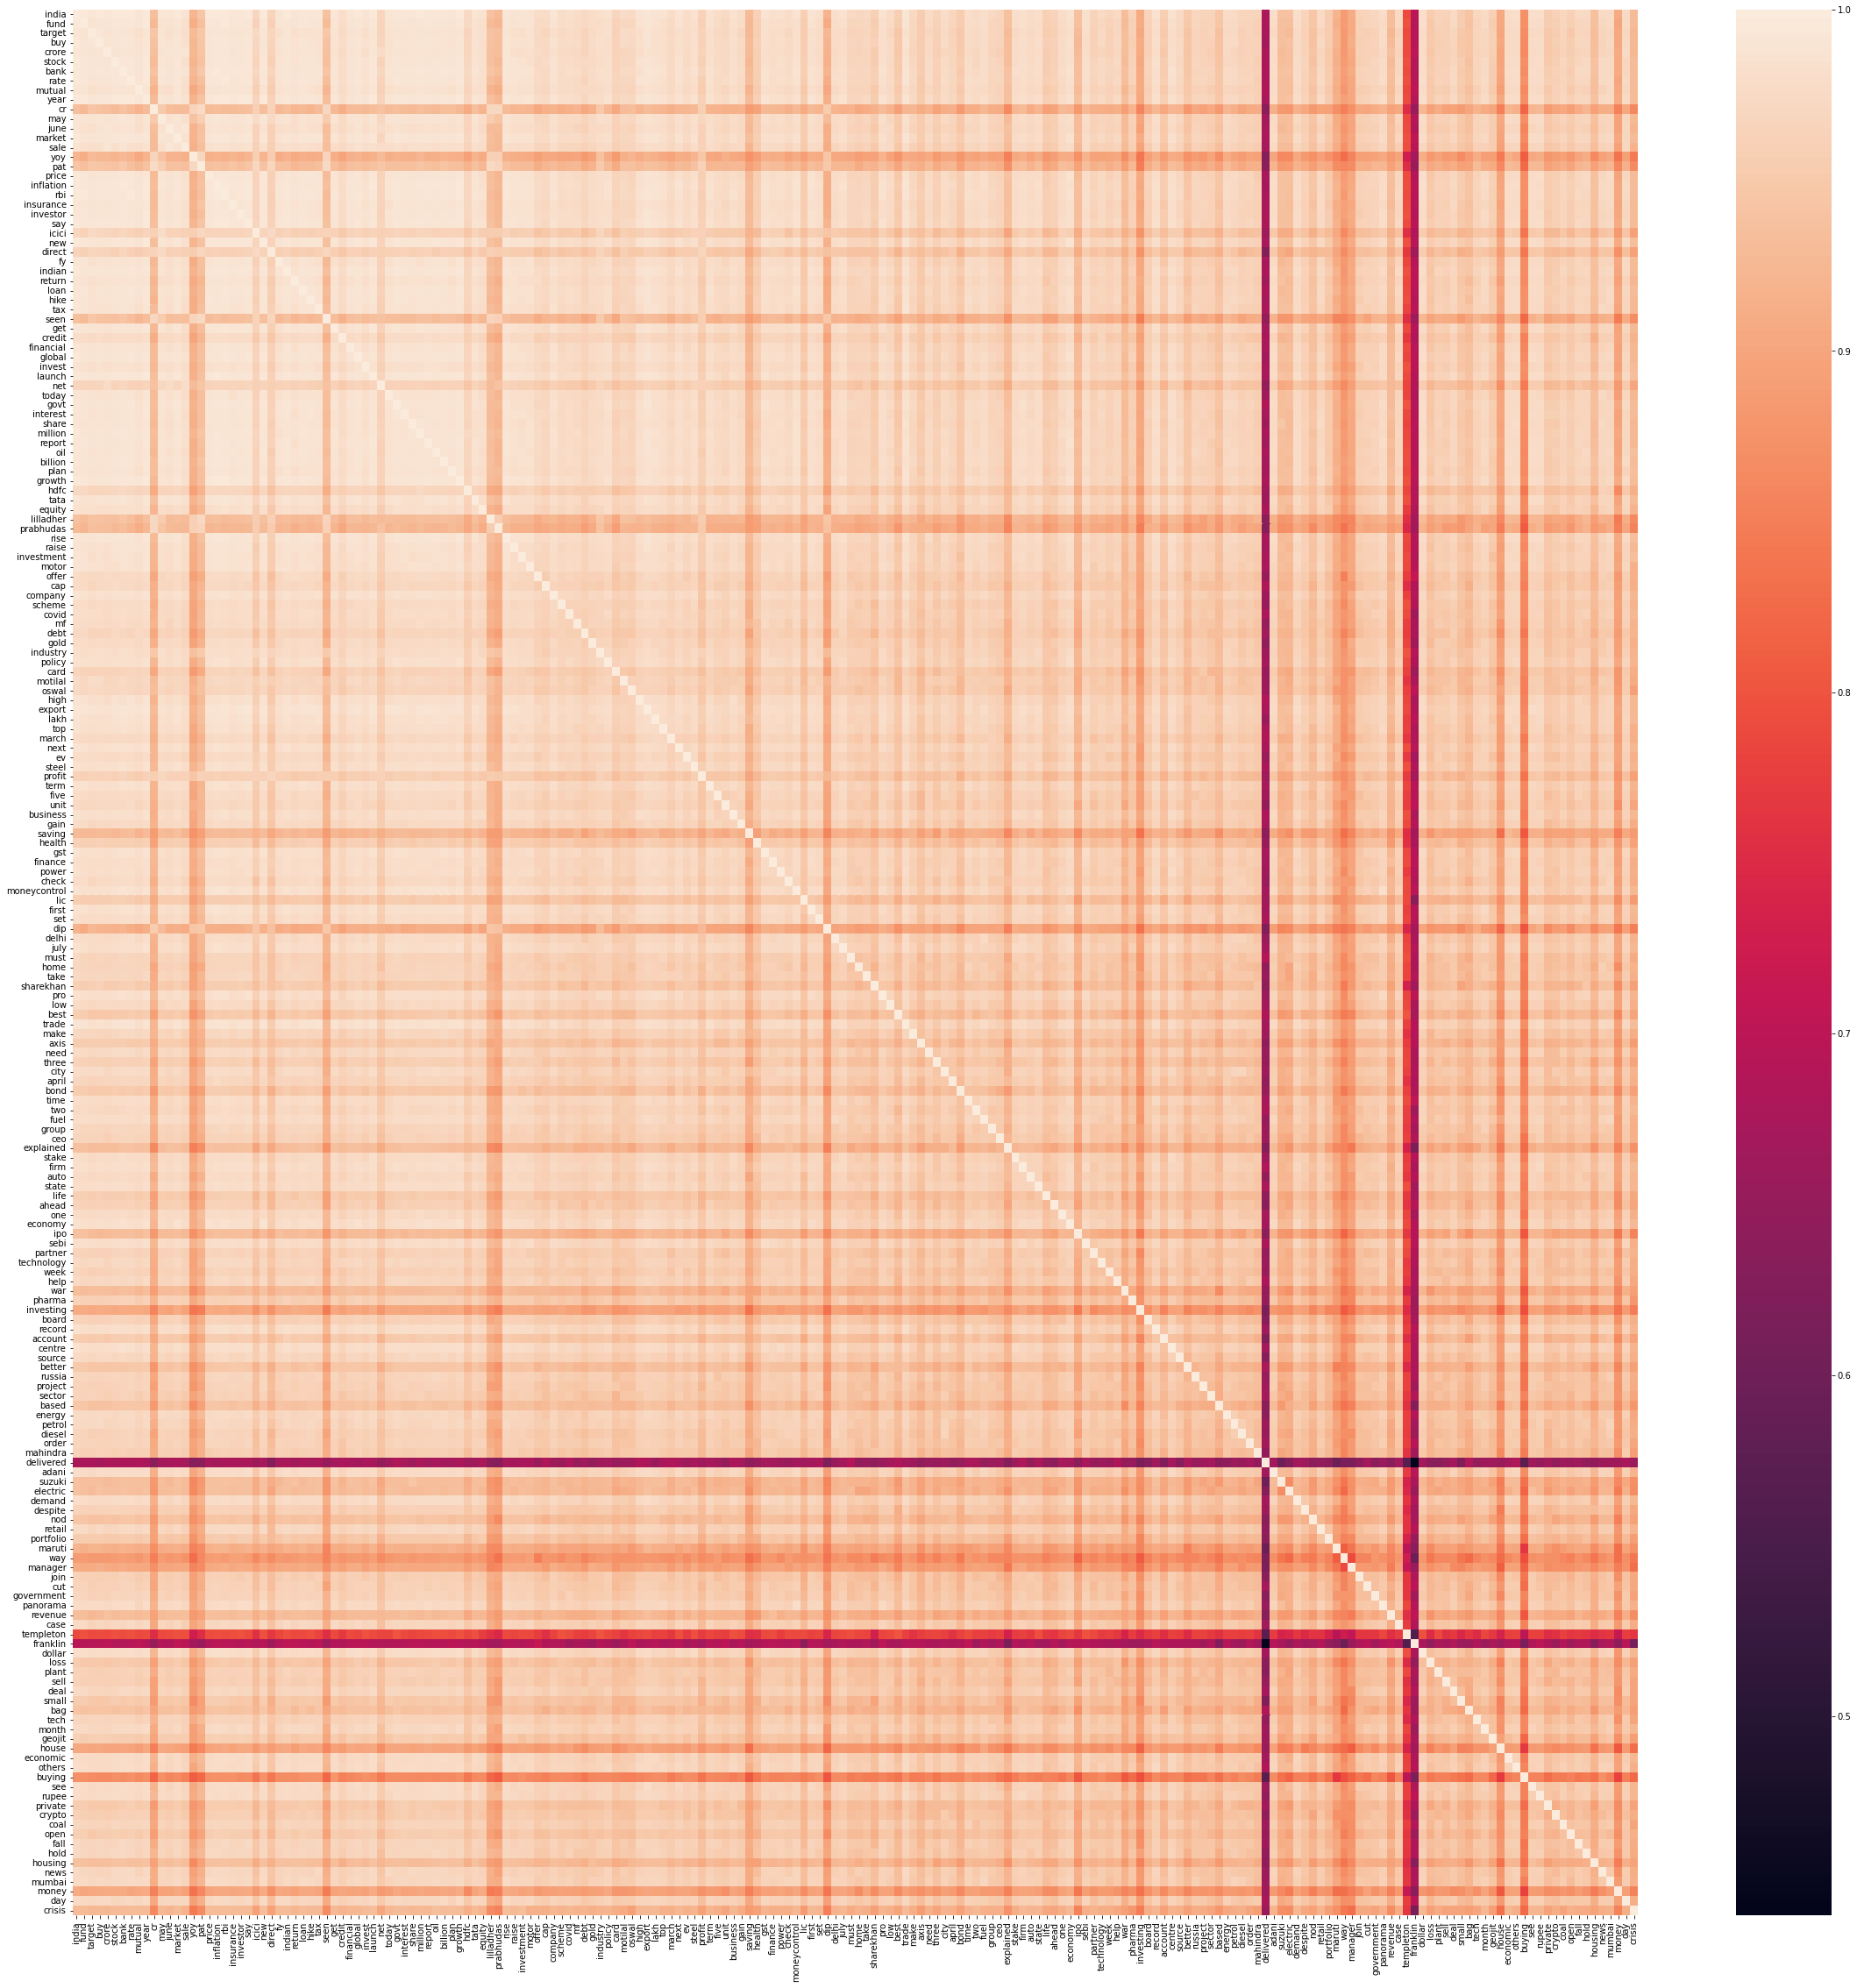

In [66]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(ax=ax, 
            data=similarities,
            xticklabels=top200_tfidf_word_vectors_m31.index, 
            yticklabels=top200_tfidf_word_vectors_m31.index)

## Doc2Vec

In [67]:
dfw.head(1)

,cleaned_title,token
0,life insurance claim would valid case death du...,"[life, insurance, claim, would, valid, case, d..."


In [68]:
review_token3 = dfw['token']

In [69]:
review_token3

0     [life, insurance, claim, would, valid, case, d...
1     [woman, manage, money, well, men, step, peculi...
2     [sell, equity, buy, gold, instead, amfi, see, ...
3     [planning, summer, holiday, five, co, branded,...
4     [explained, crypto, taxation, work, india, hyp...
                            ...                        
86    [asia, share, open, gingerly, u, inflation, ea...
87    [nomura, singapore, buy, lakh, share, bls, int...
88    [wall, street, tumble, close, worry, mount, ah...
89    [hot, stock, bet, shriram, transport, hero, mo...
90    [p, dow, close, lower, bank, earnings, inflati...
Name: token, Length: 91, dtype: object

In [70]:
tagged_documents = [TaggedDocument(review_token, [i]) 
                    for i, review_token in enumerate(review_token3)]
tagged_documents[0]

TaggedDocument(words=['life', 'insurance', 'claim', 'would', 'valid', 'case', 'death', 'due', 'war', 'need', 'know', 'inflation', 'monster', 'eat', 'saving', 'antidote', 'investment', 'motherhood', 'ahead', 'plan', 'child', 'expense', 'build', 'kitty'], tags=[0])

In [71]:
doc2vec_model = Doc2Vec(tagged_documents, 
                            vector_size=200, ##Embedding size 200 --> Change for other sizes
                            window=3, 
                            min_count=2) 

In [72]:
doc2vec_df = pd.DataFrame()
for r in review_token3: 
    vector = pd.DataFrame(doc2vec_model.infer_vector(r)).transpose()
    doc2vec_df = pd.concat([doc2vec_df, vector], axis=0)

doc2vec_df.index = dataset.index

In [73]:
doc2vec_df.shape

(91, 200)

In [74]:
doc2vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.065888,-0.031398,-0.034833,-0.106464,0.062537,0.071294,-0.018730,-0.101412,0.004725,-0.054452,...,-0.033892,0.002740,-0.017357,0.043907,0.030659,0.017838,-0.000018,0.087796,0.045984,-0.007193
1,-0.265464,-0.123110,-0.131167,-0.423315,0.237960,0.290415,-0.072103,-0.397982,0.020855,-0.205951,...,-0.128708,0.005655,-0.069141,0.176535,0.127688,0.069812,0.001643,0.358267,0.192489,-0.035013
2,-0.039704,-0.018055,-0.019133,-0.061165,0.038021,0.041071,-0.012336,-0.057034,0.002923,-0.031852,...,-0.020257,-0.000158,-0.008476,0.024499,0.020307,0.011812,-0.000479,0.055603,0.026497,-0.002598
3,-0.151103,-0.072511,-0.074401,-0.241863,0.139407,0.163843,-0.044047,-0.225548,0.012532,-0.117091,...,-0.074079,0.005403,-0.041456,0.100276,0.075222,0.042164,-0.000146,0.202887,0.108615,-0.016408
4,-0.096523,-0.041767,-0.048362,-0.149421,0.084168,0.101963,-0.029302,-0.141890,0.006672,-0.072566,...,-0.048806,0.001809,-0.025169,0.065458,0.048211,0.025760,0.002933,0.126843,0.066901,-0.012517


## Cosine similarity

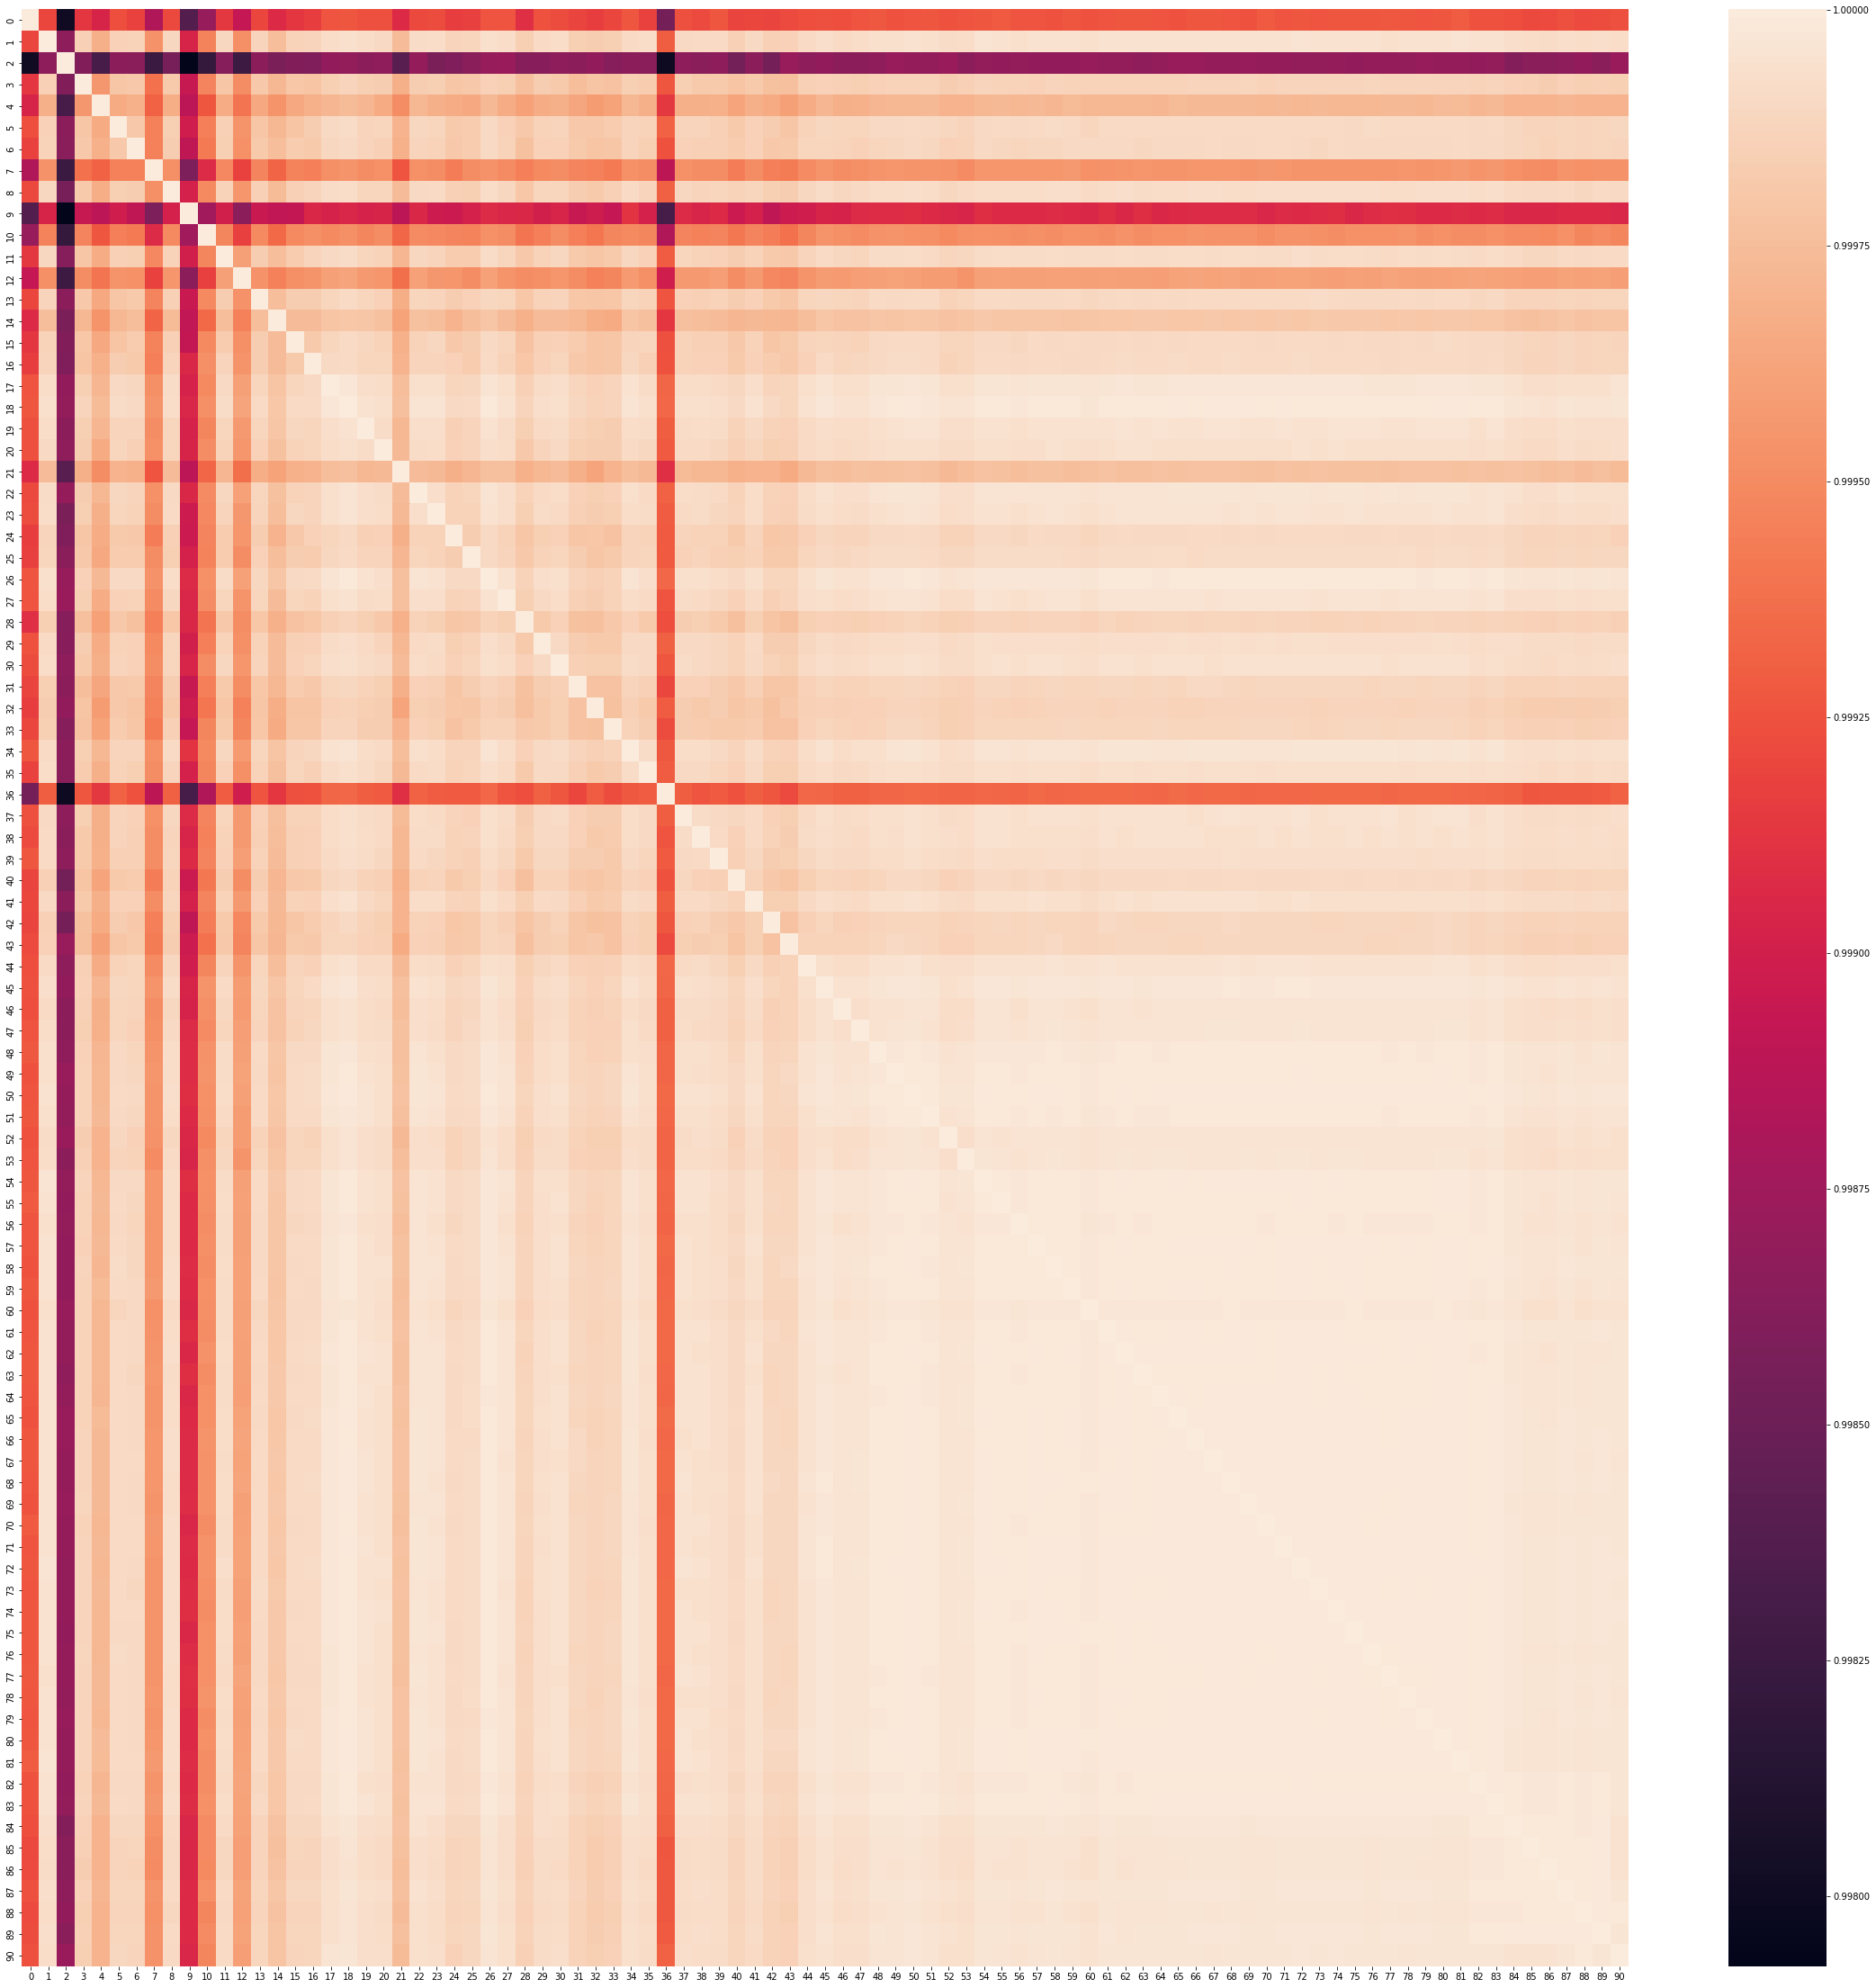

In [ ]:
# Computing the similarities
similarities = cosine_similarity(doc2vec_df, 
                                 doc2vec_df)

fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(ax=ax, 
            data=similarities,
            xticklabels=doc2vec_df.index, 
            yticklabels=doc2vec_df.index)

# Sentiment Analysis

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [76]:
doc2vec_df.shape

(91, 200)

In [77]:
dataset.sentiment.value_counts()

positive    49
negative    42
Name: sentiment, dtype: int64

In [78]:
labels = np.where(dataset.sentiment == 'negative', 0, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc2vec_df, labels,
                                                    test_size=0.33,
                                                    random_state=20130810)

## SVM

In [ ]:
model_svm = SVC()

In [ ]:
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model_svm.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_test, y_pred)

0.4838709677419355

In [ ]:
# Hyperparameter tuning
for C_value in [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]:
    model_svm = SVC(C=C_value)
    model_svm.fit(X_train, y_train)
    y_pred = model_svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred) 
    print(f"C: {C_value}, Accuracy: {acc}")

C: 0.01, Accuracy: 0.5161290322580645
C: 0.1, Accuracy: 0.5161290322580645
C: 1, Accuracy: 0.4838709677419355
C: 10, Accuracy: 0.4838709677419355
C: 100, Accuracy: 0.4838709677419355
C: 1000, Accuracy: 0.4838709677419355
C: 10000, Accuracy: 0.5483870967741935
C: 100000, Accuracy: 0.5483870967741935


In [ ]:
model_svm = SVC(C=100000)
model_svm.fit(X_train, y_train)

SVC(C=100000)

In [ ]:
model_svm.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
print(classification_report(y_test, model_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.56      0.62      0.59        16

    accuracy                           0.55        31
   macro avg       0.55      0.55      0.54        31
weighted avg       0.55      0.55      0.55        31



## Logistic Regression

In [ ]:
# Logistic Regression
model_LR = LogisticRegression(max_iter=10000)
for C_value in [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]:
    model_LR = LogisticRegression(C=C_value)
    model_LR.fit(X_train, y_train)
    y_pred = model_LR.predict(X_test)
    acc = accuracy_score(y_test, y_pred) 
    print(f"C: {C_value}, Accuracy: {acc}")

C: 0.01, Accuracy: 0.4838709677419355
C: 0.1, Accuracy: 0.4838709677419355
C: 1, Accuracy: 0.4838709677419355
C: 10, Accuracy: 0.4838709677419355
C: 100, Accuracy: 0.4838709677419355
C: 1000, Accuracy: 0.45161290322580644
C: 10000, Accuracy: 0.41935483870967744
C: 100000, Accuracy: 0.45161290322580644


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_LR = LogisticRegression(C=100)
model_LR.fit(X_train, y_train)

LogisticRegression(C=100)

In [ ]:
model_LR.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test, model_LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      0.94      0.65        16

    accuracy                           0.48        31
   macro avg       0.25      0.47      0.33        31
weighted avg       0.26      0.48      0.34        31



## Random Forest

In [ ]:
model_RF = RandomForestClassifier()

In [ ]:
for C_value in [1, 100, 500, 1000, 5000, 10000]:
    model_RF = RandomForestClassifier(n_estimators=C_value)
    model_RF.fit(X_train, y_train)
    y_pred = model_RF.predict(X_test)
    acc = accuracy_score(y_test, y_pred) 
    print(f"C: {C_value}, Accuracy: {acc}")

C: 1, Accuracy: 0.5483870967741935
C: 100, Accuracy: 0.5161290322580645
C: 500, Accuracy: 0.4838709677419355
C: 1000, Accuracy: 0.5806451612903226
C: 5000, Accuracy: 0.5806451612903226
C: 10000, Accuracy: 0.5806451612903226


In [ ]:
model_RF = RandomForestClassifier(n_estimators=1000)
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
model_RF.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
print(classification_report(y_test, model_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.62      0.62      0.62        16

    accuracy                           0.61        31
   macro avg       0.61      0.61      0.61        31
weighted avg       0.61      0.61      0.61        31



## BERT

In [79]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [80]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [81]:
X_train, X_test, y_train, y_test = train_test_split(dataset.cleaned_title, labels,
                                                    test_size=0.33,
                                                    random_state=20130810)

In [82]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size = 32)

Epoch 1/50
2/2 [==============================] - 40s 13s/step - loss: 0.7670 - accuracy: 0.5333
Epoch 2/50
2/2 [==============================] - 27s 13s/step - loss: 0.7094 - accuracy: 0.5167
Epoch 3/50
2/2 [==============================] - 27s 13s/step - loss: 0.7113 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 49s 26s/step - loss: 0.7471 - accuracy: 0.4167
Epoch 5/50
2/2 [==============================] - 45s 19s/step - loss: 0.7114 - accuracy: 0.4667
Epoch 6/50
2/2 [==============================] - 42s 19s/step - loss: 0.6808 - accuracy: 0.6000
Epoch 7/50
2/2 [==============================] - 50s 24s/step - loss: 0.7102 - accuracy: 0.4500
Epoch 8/50
2/2 [==============================] - 44s 19s/step - loss: 0.6985 - accuracy: 0.5500
Epoch 9/50
2/2 [==============================] - 34s 13s/step - loss: 0.7007 - accuracy: 0.5333
Epoch 10/50
2/2 [==============================] - 28s 13s/step - loss: 0.7260 - accuracy: 0.5000
Epoch 11/50
2/2 [============

In [85]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

1/1 [==============================] - 16s 16s/step
[0.49300063 0.54238844 0.56873554 0.62402856 0.5061471  0.4895859
 0.48691234 0.5105765  0.62201256 0.58161074 0.60136735 0.64568126
 0.56431526 0.5734859  0.52539766 0.48978102 0.5789447  0.5423632
 0.4500971  0.55644834 0.6416587  0.4334398  0.5070178  0.43559238
 0.5756304  0.4895443  0.55455756 0.54979634 0.524879   0.58522993
 0.5376163 ]


In [86]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 16s 16s/step - loss: 0.6554 - accuracy: 0.6452


[0.655410647392273, 0.6451612710952759]

In [87]:
from tensorflow.keras.models import save_model
save_model(model,filepath='/content/model',save_format='h5')

In [88]:
y = model.predict(dataset.cleaned_title)
y= y.flatten()
print(y)

3/3 [==============================] - 43s 14s/step
[0.56431526 0.54177046 0.54979634 0.5862177  0.46873686 0.5423632
 0.58522993 0.58161074 0.72163683 0.6015679  0.4895443  0.5725977
 0.4687887  0.5829737  0.62201256 0.60136735 0.6540205  0.5608997
 0.567391   0.5131368  0.5070178  0.52811104 0.62402856 0.55644834
 0.507408   0.4895859  0.5929678  0.4624204  0.4274227  0.5617519
 0.5756304  0.5102273  0.5078504  0.56205827 0.5734859  0.59402674
 0.48321664 0.61915857 0.53298783 0.54238844 0.53906626 0.57325923
 0.67019033 0.56873554 0.49524498 0.5015516  0.524879   0.5934579
 0.5105765  0.48474124 0.5545576  0.48691234 0.5583692  0.48930618
 0.5061471  0.47753394 0.53858197 0.5358964  0.49389505 0.52539766
 0.43559238 0.47624183 0.43343982 0.6456812  0.4892892  0.46946228
 0.5423733  0.4490471  0.5595912  0.48978102 0.5288335  0.52949405
 0.644842   0.60464567 0.5345304  0.572562   0.6416587  0.537616
 0.59041137 0.54042464 0.53037006 0.5784319  0.489892   0.5352726
 0.54123116 0.5008

In [91]:
pd.DataFrame(y)

,0
0,0.564315
1,0.541770
2,0.549796
3,0.586218
4,0.468737
...,...
86,0.578945
87,0.493001
88,0.526508
89,0.501978


In [92]:
pd.DataFrame(y).to_csv('bert_score.csv',index=False)

## LSTM

In [ ]:
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X = dataset.cleaned_title

In [93]:
y=labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [ ]:
max_words = 5000
max_len = 5000

In [ ]:
tok = Tokenizer(num_words=max_words)

In [ ]:
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [ ]:
sequences_matrix.shape

(72, 5000)

In [ ]:
def build_RNN_model():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 64, input_length=max_len, mask_zero=True)(inputs)
    layer = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3))(layer)
    layer = Bidirectional(LSTM(32, dropout=0.3))(layer)
    layer = Dense(64, name='FC1', activation='relu')(layer)
    layer = Dense(1, name='out_layer', activation='sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = build_RNN_model()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 5000)]            0         
                                                                 
 embedding (Embedding)       (None, 5000, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 5000, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 FC1 (Dense)                 (None, 64)                4160      
                                                                 
 out_layer (Dense)           (None, 1)                 65  

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(sequences_matrix, y_train,
                    batch_size=16,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_accuracy',
                                             patience=3)])

Epoch 1/10
4/4 [==============================] - 219s 52s/step - loss: 0.0000e+00 - accuracy: 0.4211 - val_loss: 0.0000e+00 - val_accuracy: 0.5333
Epoch 2/10
4/4 [==============================] - 201s 51s/step - loss: 0.0000e+00 - accuracy: 0.4211 - val_loss: 0.0000e+00 - val_accuracy: 0.5333
Epoch 3/10
4/4 [==============================] - 199s 50s/step - loss: 0.0000e+00 - accuracy: 0.4211 - val_loss: 0.0000e+00 - val_accuracy: 0.5333
Epoch 4/10
4/4 [==============================] - 220s 57s/step - loss: 0.0000e+00 - accuracy: 0.4211 - val_loss: 0.0000e+00 - val_accuracy: 0.5333


In [ ]:
history.history

{'accuracy': [0.42105263471603394,
  0.42105263471603394,
  0.42105263471603394,
  0.42105263471603394],
 'loss': [0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [0.5333333611488342,
  0.5333333611488342,
  0.5333333611488342,
  0.5333333611488342],
 'val_loss': [0.0, 0.0, 0.0, 0.0]}

In [ ]:
from tensorflow.keras.models import save_model
save_model(model,filepath='/content/model',save_format='h5')

In [ ]:
model.save()